In [1]:
pip install pandas statsmodels nltk scikit-learn matplotlib

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


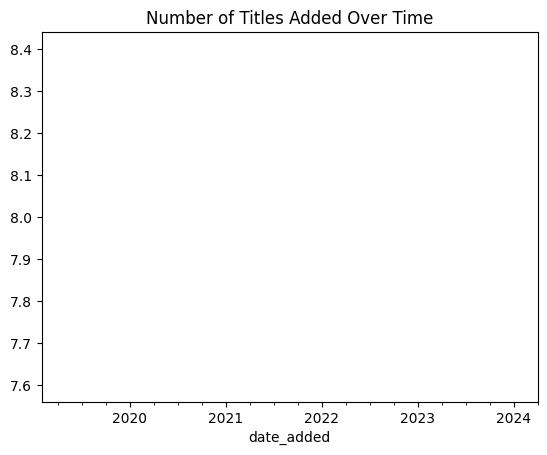

ValueError: x must have 2 complete cycles requires 24 observations. x only has 1 observation(s)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Load Disney+ titles dataset
def load_data():
    data = {
        'show_id': ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8'],
        'type': ['Movie', 'Movie', 'Movie', 'TV Show', 'TV Show', 'TV Show', 'Movie', 'Movie'],
        'title': ['A Spark Story', 'Spooky Buddies', 'The Fault in Our Stars', 'Dog: Impossible', 'Spidey And His Amazing Friends', 'Star Wars: Visions', 'Confessions of a Shopaholic', 'Descendants: Royal Wedding'],
        'director': ['Jason Sterman, Leanne Dare', 'Robert Vince', 'Josh Boone', '', '', '', 'P.J. Hogan', 'Salvador Simó'],
        'cast': ['Apthon Corbin, Louis Gonzales', 'Tucker Albrizzi, Diedrich Bader, Ameko Eks Mass Carroll, Max Charles, Tim Conway, Jennifer Elise Cox', 'Shailene Woodley, Ansel Elgort, Laura Dern, Sam Trammell, Nat Wolff, Willem Dafoe', 'Matt Beisner', 'Benjamin Valic, Lily Sanfelippo, Jakari Fraser, Dee Bradley Baker, Melanie Minichino', '', 'Isla Fisher, Hugh Dancy, Joan Cusack, John Goodman, John Lithgow, Kristin Scott Thomas', 'Dove Cameron, Sofia Carson, Booboo Stewart, Mitchell Hope, Sarah Jeffery, Melanie Paxson'],
        'country': [np.nan, 'United States, Canada', 'United States', 'United States', 'United States', np.nan, 'United States', np.nan],
        'date_added': ['September 24, 2021', 'September 24, 2021', 'September 24, 2021', 'September 22, 2021', 'September 22, 2021', 'September 22, 2021', 'September 17, 2021', 'September 17, 2021'],
        'release_year': [2021, 2011, 2014, 2019, 2021, 2021, 2009, 2021],
        'rating': ['TV-PG', 'G', 'PG-13', 'TV-PG', 'TV-Y', 'TV-PG', 'PG', 'TV-G'],
        'duration': ['88 min', '93 min', '127 min', '2 Seasons', '1 Season', '1 Season', '106 min', '22 min'],
        'listed_in': ['Documentary', 'Comedy, Fantasy, Kids', 'Coming of Age, Drama, Romance', 'Animals & Nature, Docuseries, Family', 'Action-Adventure, Animation, Kids', 'Action-Adventure, Animation, Anime', 'Comedy, Romance, Romantic Comedy', 'Animation, Fantasy, Musical'],
        'description': [
            'Two Pixar filmmakers strive to bring their uniquely personal SparkShorts visions to the screen.',
            'The puppies go on a spooky adventure through a mysterious haunted mansion in this fur-raising flick.',
            'Hazel and Gus share a love that sweeps them on an unforgettable journey.',
            'Matt Beisner uses unique approaches to modifying canine behavior and focuses on each animal’s needs.',
            'Spidey teams up with pals to become The Spidey Team!',
            'An animated anthology celebrating Star Wars through the lens of the world’s best anime creators.',
            'Becky writes a personal finance column en route to a high-fashion mag job.',
            'Mal and Ben’s wedding is finally here!'
        ]
    }
    return pd.DataFrame(data)

# Example 1: Time Series Analysis
def time_series_analysis(data):
    # Process date_added column
    data['date_added'] = pd.to_datetime(data['date_added'])
    data = data.dropna(subset=['date_added'])
    data.set_index('date_added', inplace=True)

    # Aggregate data by month
    monthly_data = data.resample('M').size()
    monthly_data.plot()
    plt.title('Number of Titles Added Over Time')
    plt.show()

    # Decompose the time series
    decomposition = sm.tsa.seasonal_decompose(monthly_data, model='additive', period=12)
    decomposition.plot()
    plt.show()

    # Forecasting using ARIMA
    model = sm.tsa.ARIMA(monthly_data, order=(5, 1, 0))
    results = model.fit()
    print(results.summary())
    results.plot_predict(start=len(monthly_data), end=len(monthly_data) + 12, dynamic=False)
    plt.show()

# Example 2: Sentiment Analysis
def sentiment_analysis(text_data):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = [sia.polarity_scores(text) for text in text_data]
    return sentiment_scores

# Example 3: Clustering and Classification
def clustering_and_classification(data):
    # Feature extraction for clustering
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data['description'].fillna(''))

    # Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    data['cluster'] = kmeans.fit_predict(X.toarray())

    # Classification
    y = data['type'].apply(lambda x: 1 if x == 'Movie' else 0)  # Binary classification: Movie=1, TV Show=0

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

# Example Usage
if __name__ == "__main__":
    data = load_data()

    # Time Series Analysis
    time_series_analysis(data)

    # Sentiment Analysis on descriptions
    text_data = data['description'].fillna('').tolist()
    sentiments = sentiment_analysis(text_data)
    print(sentiments[:5])  # Print first 5 sentiment scores

    # Clustering and Classification
    clustering_and_classification(data)
